In [1]:
using PyPlot
using Interact
using PyCall
@pyimport matplotlib.animation as anim  

INFO: Recompiling stale cache file /home/david/.julia/lib/v0.4/Reactive.ji for module Reactive.


  likely near /home/david/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/david/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [2]:
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/david/.julia/v0.3/IJulia/src/execute_request.jl:177
 in eventloop at /home/david/.julia/v0.3/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading /home/david/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


integrar (generic function with 2 methods)

Interact.Slider{Float64}([Reactive.Input{Float64}] 25.0,"σ",25.0,0.0:0.1:50.0)

Interact.Slider{Float64}([Reactive.Input{Float64}] 25.0,"β",25.0,0.0:0.1:50.0)

Interact.Slider{Float64}([Reactive.Input{Float64}] 25.0,"ρ",25.0,0.0:0.1:50.0)

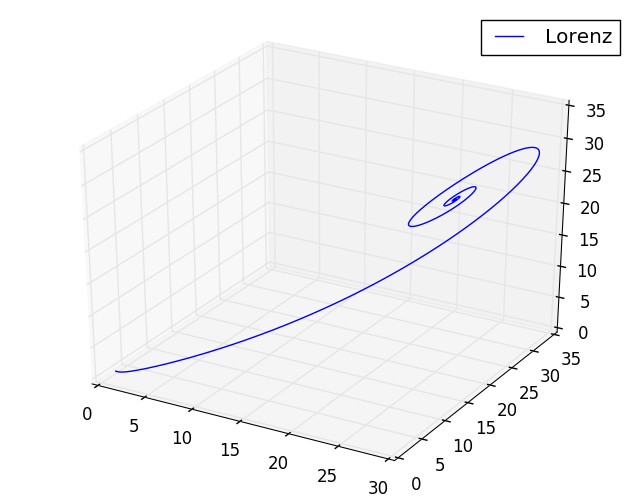

In [3]:
fig = figure()

@manipulate for σ in 0:.1:50, β in 0:.1:50, ρ in 0:.1:50
    withfig(fig) do
        function lorentz(xx,t)
            x,y,z = xx
            [σ*(y-x), x*(ρ-z)-y, x*y-β*z]
        end
        xs, ts = integrar(lorentz,[1., 1., 1.],0. ,20.1 ,1e-3,4)
        plot3D([x[1] for x in xs],[x[2] for x in xs],[x[3] for x in xs],label="Lorenz")
        legend()
    end
end

Interact.Slider{Float64}([Reactive.Input{Float64}] 50.0,"t",50.0,0.0:0.01:100.0)

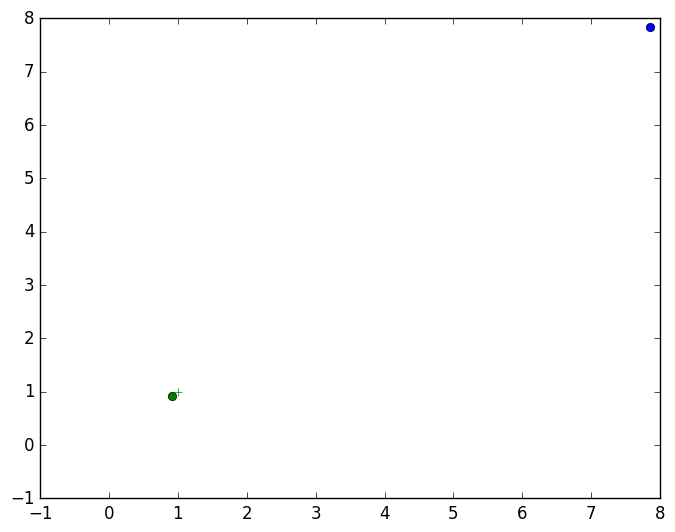

In [4]:
function doscuerpos(xx,t)
    m1 = 1
    m2 = 100
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = xx
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    [u1x,-m2*normi*(x1x-x2x),u1y,-m2*normi*(x1y-x2y),u2x,-m1*normi*(x2x-x1x),u2y,-m1*normi*(x2y-x1y)]
end
fig = figure()

@manipulate for t in 0:.01:100
    withfig(fig) do
        xs, ts = integrar(doscuerpos,[-1.,0.,-1.,0.,1.,0.,1.,0.],0. ,t ,1e-2,20)
        final = xs[length(xs)]
        plot(-1,-1,"b+")
        plot(1,1,"g+")
        plot(final[1],final[3],"bo")
        plot(final[5],final[7],"go")
    end
end

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACaVdtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAJ6IZYiEABb//vfTP8yy6/c5teOo96KeJl9DdSUBm5bE7TqAAAADAAADAAADAA/hMFtS4RUJjBaAAAADAd8ANyA1gE133f+Ehj4FIKSPxfsAqH1WIIKe38tUG1UZ8kq/TlNKAReQd8pCnz20hIr94QgIsoRkZOD19Pj3DEe1EHHx1dqFKvX0UrByubY51XBpwr6LuoU2YKPjU3dZDd/3rnE/LuvALX1UqBEG0DEjmIiqKrN+M9Q/WzofAE+jvDLJ+u83sQ1ceKOwAc0sd43uOCZnQzVLygUnvR2PE0dkGjl2/cdBZI4nIq+ImOn8JG0oUTUNaerNoj9xa4P0Qabi1b1kIKrVyYVWJPhSdSNIMlec5HufjVKi0BeK0IdTH5QCqDCxY1/L5t7R0GszG11Yp1mMvEOPmqGv6adryoqCw1kEifbuwPbvLHo6l8s0gRFyflh4KN1CBm6nXUInDh44aOwPaWfgJaDVgXUc1Yd44Gh/3sZj7+EPVJIwrdJMB/giSg5GrCPgL+aYlBRAojI6qh2pUEhOOYIGmVSlLl9SJ2L4/wflG6vLZqovwnH/gxDO4CAxf0S8Agl9zp/uv6dhHBsztmnLOXK94wuFRJXq0qly4JCwWSmNveHPQUg80fuww9JSrJgjIsMlzh4QeRECY5Ap9a8mNQwKDJMhg8zu98dP1+m5+BoJxqbhjdow0MXP7jop6l4E5OhShC7H+bQNaRzGduFEt3zrwXQjaUz1miiQORCBc8fbLHe3TmOFTQByUPjgMh0+R4XTZY5gzMb2nwxVSVca8ainqyYWt6Zl7PRDTRCUKBP+1n8lzlc6XhZ/n9VruJK/u4i1NcPu08Tv7ogZ80acC9nvjSdbNaMRy/TFSzRUs+bJ1A7YzGXFqZHG/IsHLD8vu7qcNVvJPbUZ2Q6lrmV9CwBeAeukUOnTz5pAvs75vgcqBbj18ta8Qp6Sp+TNIWiusSYCsvOtTprj2OgO8fvhnWh65WijdUVdC/2Wp0aJvBPyELEF5GH1Kj62q3QL6VzrM4aOEaS6e6XYlI0eBYm0iYGVT+nRvdk4eNNccg4JAOF3pAgEjMZqq4jaVe7E/v+OiW8oPi8cqN2aqjh+AEshgrMTOdntEgCO3AGFgZ1Ftk9Ct/Z3Cwb9uw4Pl25t6waQC4GZsYJ3yB76OrAPIdz/lO4EZQzOtdMzyYycmOaY7TDisWrkseDoYdE4nZg1g9vuu6uXS+Xyo0CBBt1nD1reUicGTp+wf7KzmfCRB08+lUzQ2PhVYdYpZh1plTyREjfle0gvqIfyeagv0RBsAD3TuGLQUKuxWJJZGpPswHQNBnoWJ3RMs7yCIzy5HeE3jQJ6y35a6dFeNjZrGFcRVPZZwdA0g7JneBKXNUsGUBf3TmrXVoPoZqF42DjTJszQ+5LZlVFMYHNkIbwIlAkAKbLS6WLrf30Ox6J6f21dAJxZaEE4XOx7USDU2ckBbc3c+vq2+og5JRqX3JuCwQkMwCLnv6SCFQFHYA6YWjeu1wcpz1cEUcYbssIIhJTsJGDbp9xeCdQBgAQe+ZrIdkrbC0La6rh3ACbwkNaMhf1jF1xvWaZp8c91d2BQuXTA3PUJOHFfkjWp48lp0/177PaGUAa03j3P+TUI2MafL63+yUtBAKzu1NivOdkiUd172GG8kge8EYHfPSC/F/qnLwYhCIBpr4/H4u8LZxWuvqWI/yBFgybJFTUq1nqEcafUi8GRjjFVVDceO5lQ2aPpDcZcSbuLqkD0v/rOft56jijvL4c1OfjFmlfSFb7dQxT30RCRfRfAVnsTwefasahCrXy5nh6Uga2eliteFVlOe2c4KeouPfBa/Wqu+gMghPxOzgIy0zIiJHV62ClkladQxETr43m2nidBfBSg92gDx0PpKaXxrgybVOPpt/ZVZn4hlq1eRZA43yJAActvcye2NIJAbx7q7v0uNsi2wRHrG+260YYOzMHjWN9hwHcUgkE1ZEkJjt9tWdy9twn7PHPiSxwSv/RCkSzwfe0ss5MooadNrEeqmguuWiuo/RQOsrA36bpNxcNpQ5tJTn4TPS+Nm3y8aPGi9L5uHy6bgEykGK07V6kDj5TX7ZBikXTq0RtE8IDaSD+iBQfcZOHnr9sX//JCLlIfIww3pXPOAx2yGfWPhkM8FU3DMoPGO0OdjGLr+JHmDpLCyIYCFK0b1YdMzimzB7W3YNMbc/amlQYR6aZNHoWWMCn64ULCvP04RgOeyu8fMT+WK5JOf7GRGtKIDMo62vffqETpTl6SPtVT8P59qVGYMtQQZcwTi7NQofKLHXIs++BsLriHmX6HfB/gbA3HpAsprmaI4+rytiRb+WcAft6nC0hlumLXioq51flDklQ/5v5g1LoHFKFSqbIDGTcT9XcCFTX7xLKEvowcnakVQBicGAGkjjZQQYOufsPDJhmRYLCHoMfLtCbVz56kZsMk1mcIHKJjkQJhpCbnALbzCcb7yA5kMgR7TfKuYOx1S9D/P6ey8K7bvT3oJmB0M9EIvBEMMt0tCYa+ibq6OC1exggd6ZiO8IWuse3k83VCmj+ddhMTEB/EmuVrp0WF1qbzc3Ai0BS54dDeKWMM9twp6dUVxfSk9bMj01aOz+QJUxxWVq5cLzMYjtjFAReYnV42HDGVcX6OuhPN3n9d0hrTYIXlFzgovR7Wr30GbrGWmYVb9Izf7mRLqE27Ta9N4xAcNkR3Sfz5eX1aKB3lARHMqBm5SgijdarRmFXE0E9+xTL0EXPy4oxo+hvPyx4MSidNsgT95zKecHF/2wYIRa2wdPlfLIWd37BiggFy8iGMs0fQrhrg1O6W17V6NwYpTk0uYMuBhmsT+/4GGYNOq49dhdXHq+PaBb9xTA3F6Sla6UEJFvApG3zUwp1qPF/I7sub1NlejXgRG/xobnSpgIKct8BRwA175XCF6d0VfwVPqLD9KNhZqd95unU5yHa91amBk+dYfvNhoQj

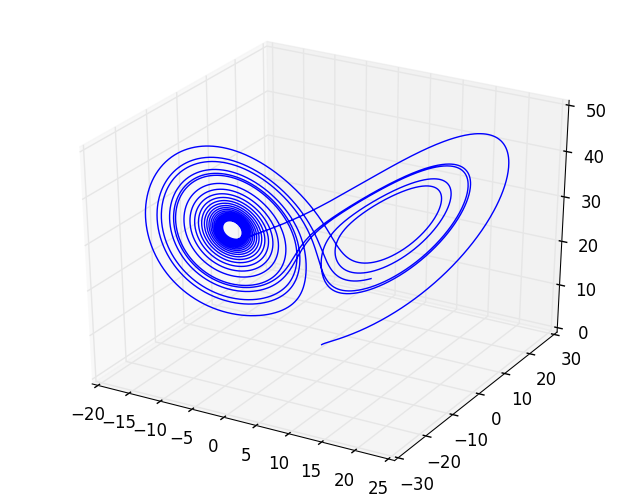

In [5]:
fig = figure()
function newsarge(ρ)
    σ=10
    β=8/3
    function lorentz(xx,t)
        x,y,z = xx
        [σ*(y-x), x*(ρ-z)-y, x*y-β*z]
    end
    xs, ts = integrar(lorentz,[1., 1., 1.],0. ,20.1 ,1e-3,4)
    [x[1] for x in xs],[x[2] for x in xs],[x[3] for x in xs]
end
ims = [plot3D(newsarge(t)[1],newsarge(t)[2],newsarge(t)[3],"b") for t in 27:0.2:29]
#Lo que sigue
ani = anim.ArtistAnimation(fig, ims, interval=500, blit=true) 
ani[:save]("lorenz.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,"lorenz.mp4")),"""" type="video/mp4"></video>"""))

In [ ]:
fig = figure()
function sarge(t)
    xs, ts = integrar(doscuerpos,[-1.,0.,-1.,0.,1.,0.,1.,0.],0. ,t ,1e-3,20)
    #a,b,c,d = [x[1] for x in xs, x[3] for x in xs, x[5] for x in xs, x[7] for x in xs] 
    [x[1] for x in xs],[x[3] for x in xs],[x[5] for x in xs],[x[7] for x in xs]
end
    
ims = [plot(sarge(t)[1],sarge(t)[2],sarge(t)[3],sarge(t)[4]) for t in 0:0.001:.6]
#Lo que sigue
ani = anim.ArtistAnimation(fig, ims, interval=500, blit=true) 
ani[:save]("seno.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,"seno.mp4")),"""" type="video/mp4"></video>"""))